In [1]:

%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [44]:
vehdf= pd.read_csv("vehicle.csv")

vehdf.head(200)

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
195           86         43.0                  66.0         130.0   
196          107         56.0                 104.0         231.0   
197           82         44.0                  72.0         150.0   
198           81         46.0                  71.0         130.0   
199           82         44.0                  72.0         136.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
195                  56.0                        7          152.0   
196                  71.0                       11          219.0   
197                  64.0                        7          154.0   
198                  56.0                        7          153.0   
199                  61.0                        7          147.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
195           44.0                    19.0                        142   
196           31.0                    25.0                        172   
197           44.0                    19.0                        144   
198           44.0                    19.0                        149   
199           46.0                    19.0                        143   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
195            177.0              340.0                      173.0   
196            226.0              705.0                      217.0   
197            181.0              350.0                      177.0   
198            172.0              342.0                      191.0   
199            173.0              317.0                      183.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
195                         81.0             6.0              14.0   
196                         71.0            19.0              11.0   

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
columns = vehdf.columns
print(columns)
vehdf['class'] = le.fit_transform(vehdf['class'])
vehdf.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [4]:
#Performing EDA:
#Finding Any Missing Value
#Finding Outliers
#Understanding attributes using descriptive statistics
#visualizing attribute distribution using univariate and multivariate analysis
#Finding attribute correlation and analysing which attribute is more important

In [5]:
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
##Quick Insights:
##We can see that :

##circularity, class, hollow_ratio,max.length_rectangularity, , max.length_aspect_ratio, compactness has no missing values rest all features are having some kind of missing values 
##All attributes are of numerical type

In [7]:
from sklearn.impute import SimpleImputer

newdf = vehdf.copy()

X = newdf.iloc[:,0:19] #separting all numercial independent attribute
#y = vehdf.iloc[:,18] #seprarting class attribute. 
#imputer = SimpleImputer()
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with mean column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns = column )
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [8]:
print("Original null value count:", vehdf.isnull().sum())
print("\n\nCount after we impiuted the NaN value: ", newdf.isnull().sum())

Original null value count: compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


Count after we impiuted the NaN value:  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity     

In [9]:
##Obseravtion:
##If you carefully observe above, our orginal dataframe vehdf and new dataframe df , we will find that , After we imputed the datfarme series , using simpleimputer, we can see that the missing NaN values from our orginal vehdf datframe columns are treated and replaced using mode strategy.

In [10]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [11]:
newdf.shape

(846, 19)

In [12]:
##Quick Insights On descriptive stats:
##Compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier
##circularity : it also seems to be normally distribted as mean amd median has similar values
##scatter_ratio feature seems to be having some kind of skewness and outlier
##Scaled variance 1 & 2

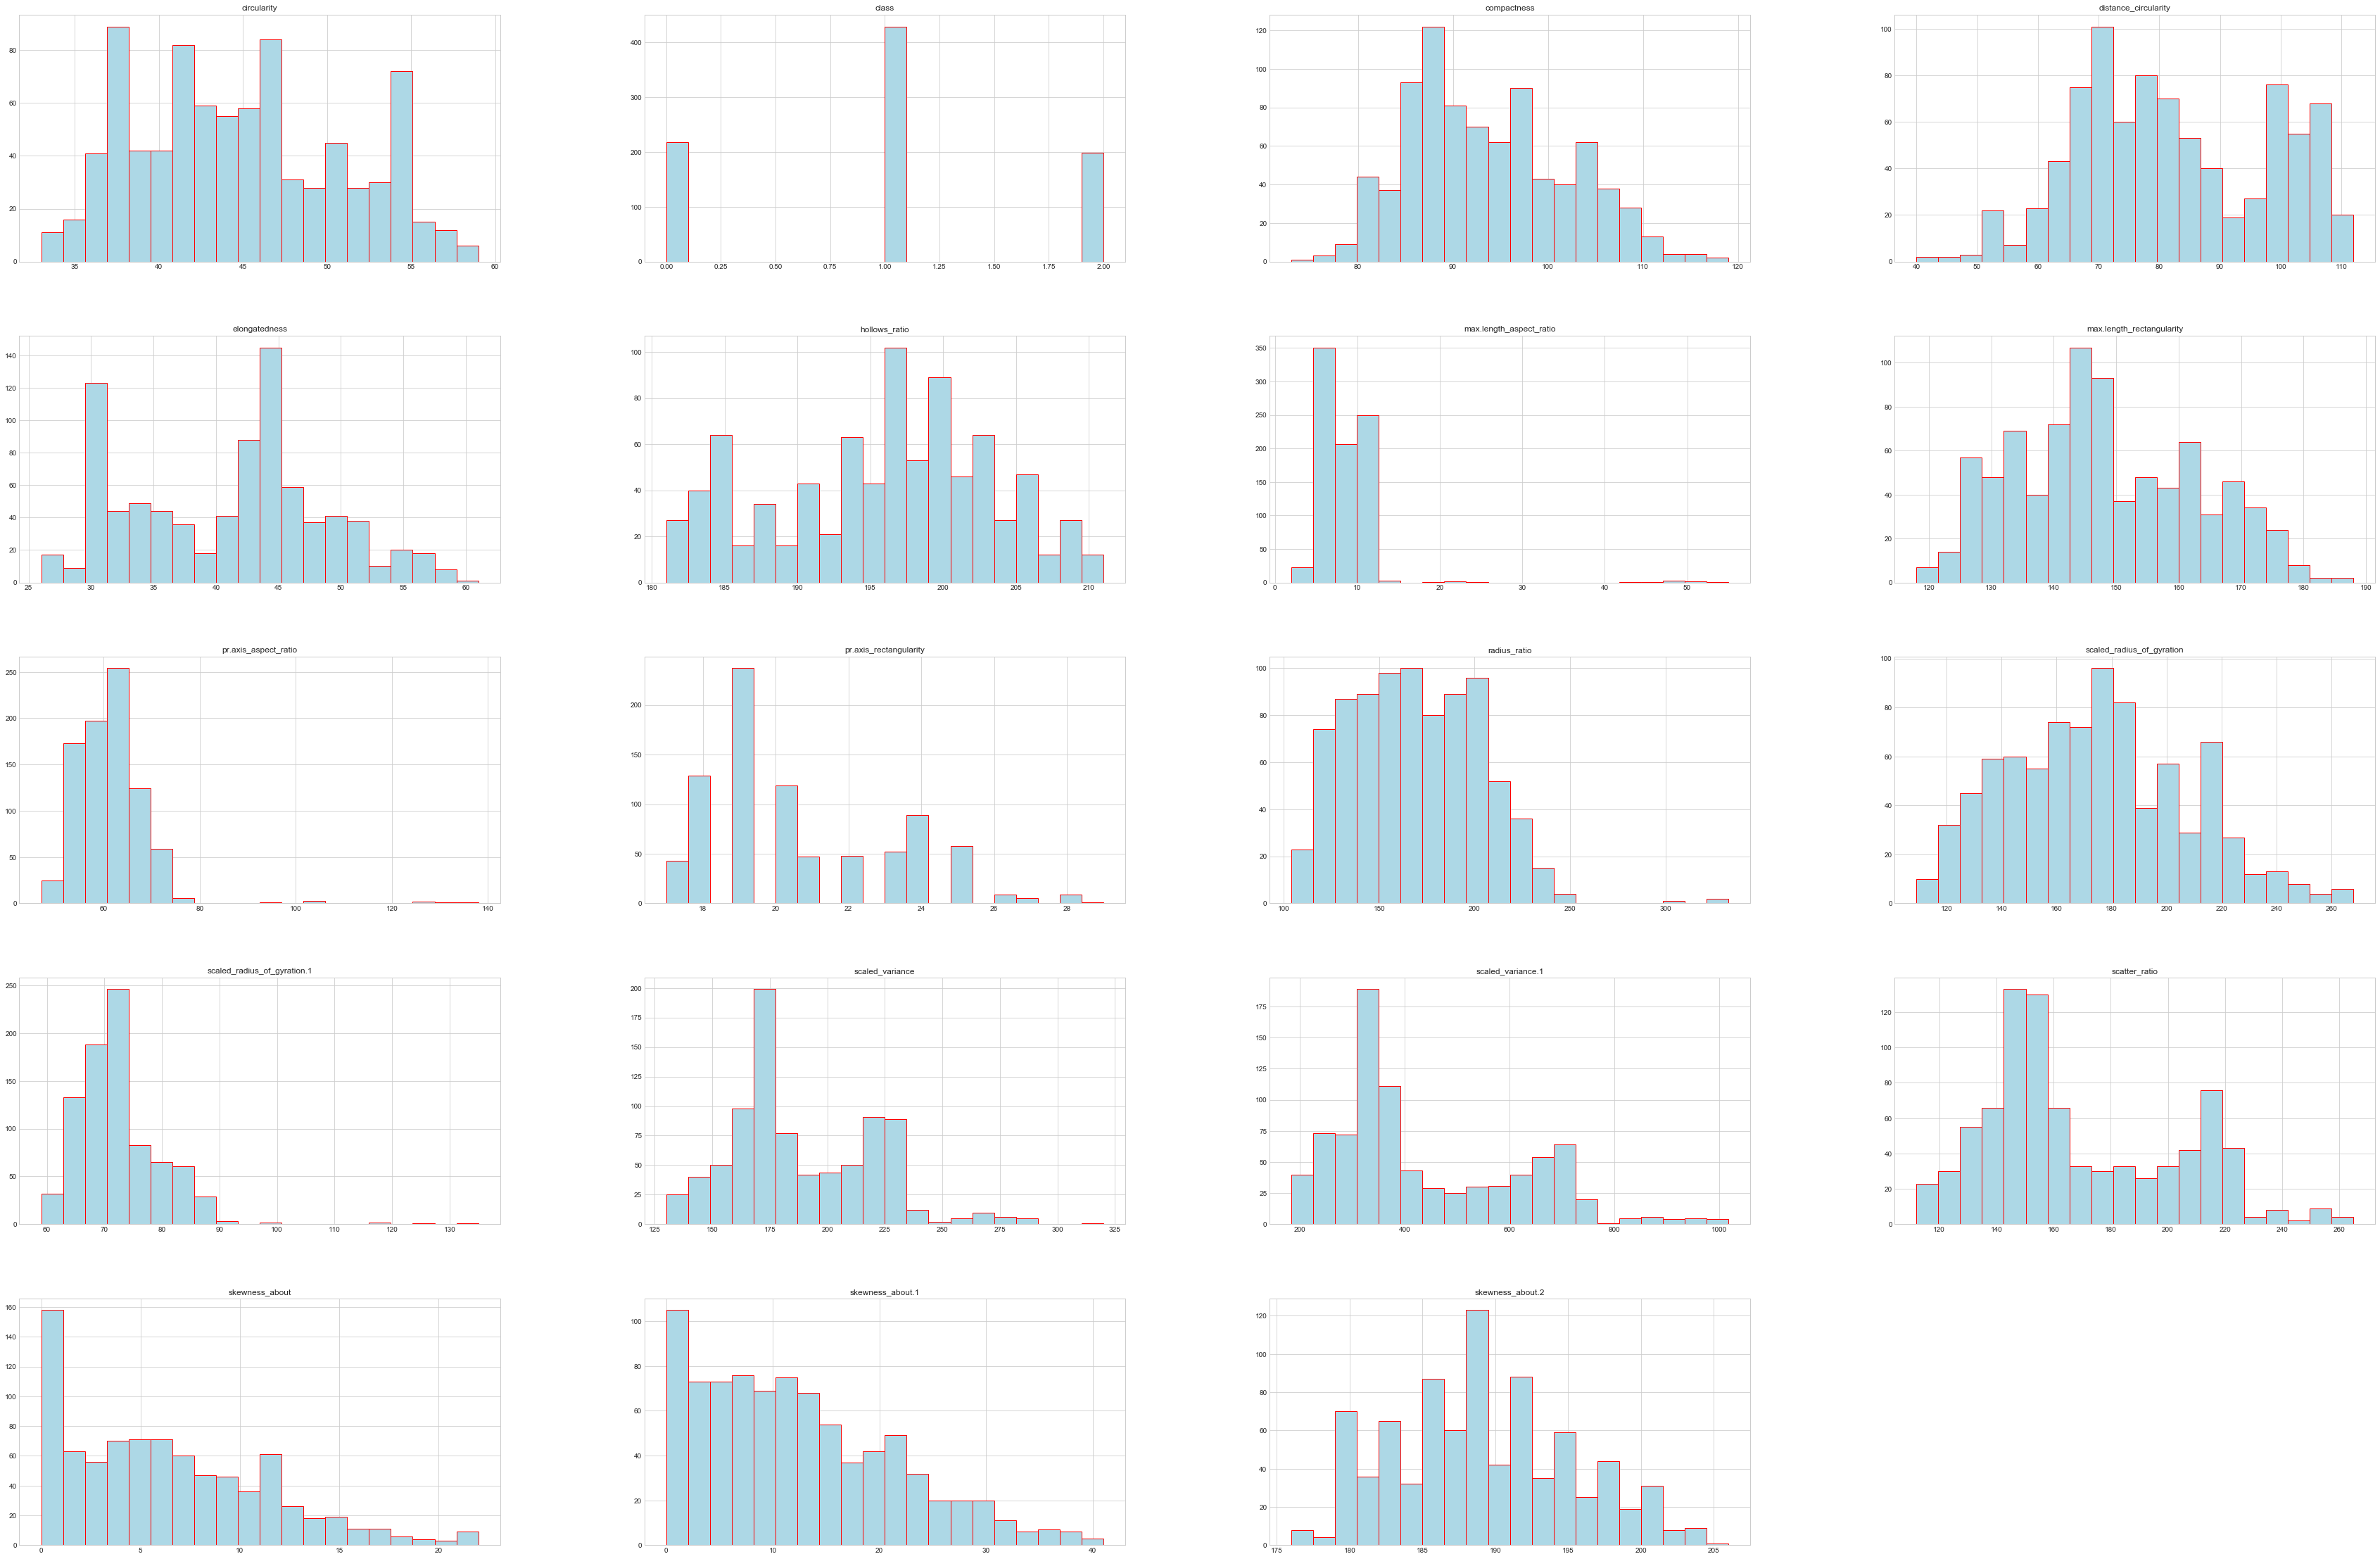

In [13]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

In [14]:
##Quick Observation :

##Most of the data attributes seems to be normally distributed
##scaled valriance 1 and skewness about 1 and 2, scatter_ratio, seems to be right skwed .
##pr.axis_rectangularity seems to be haing outliers as there are some gaps found in the bar plot.

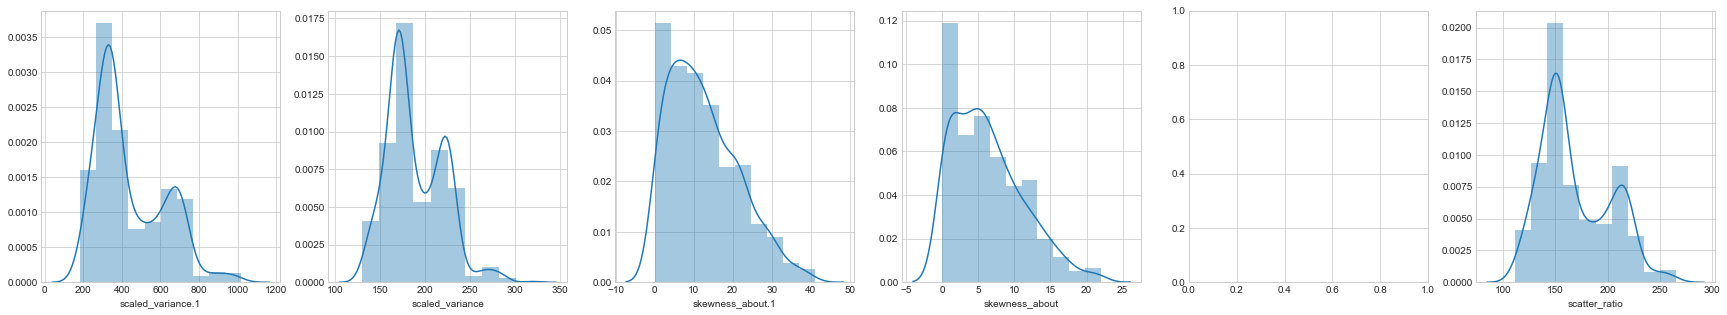

In [15]:
#Let us use seaborn distplot to analyze the distribution of our columns and see the skewness in attributes
f, ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

f.savefig('subplot.png')

In [16]:
skewValue = newdf.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


In [17]:
##Univariate Analysis Using Boxplot:
##In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

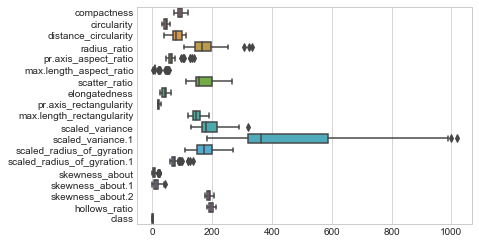

In [18]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers

ax = sns.boxplot(data=newdf, orient="h")

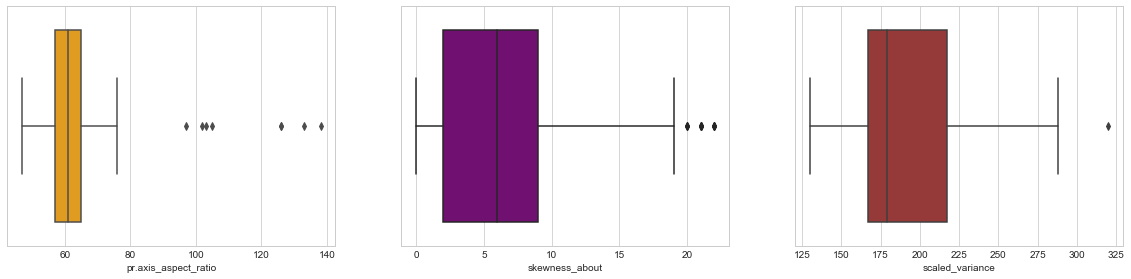

In [19]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about, color='purple')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance, color='brown')

plt.show()

In [20]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['radius_ratio'], color='red')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf['scaled_variance.1'], color='yellow')

plt.show()

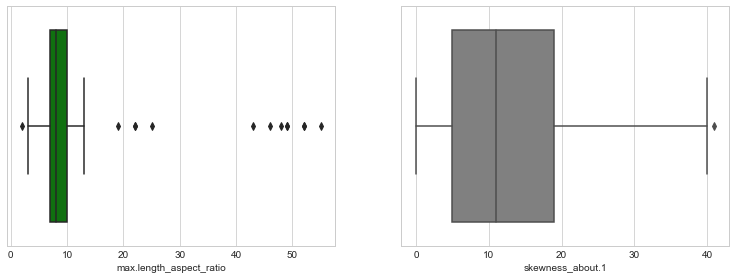

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'], color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf['skewness_about.1'], color='grey')


plt.show()

In [22]:
##Observation on boxplots:¶
##pr.axis_aspect_ratio, skewness_about, max_length_aspect_ratio, skewness_about_1,
##scaled_radius_of_gyration.1, scaled_variance.1, radius_ratio, skewness_about, scaled_variance.1 are some of the attributes with outliers. which is visible with all dotted points

In [23]:
##Treating Outliers Using IQR: Upper whisker¶
##The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [24]:
newdf.shape

(846, 19)

In [25]:
##As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier

In [26]:
from scipy.stats import iqr

Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [27]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape


(813, 19)

In [28]:
##Let's Plot The Box Plot Once Agaian To See if outliers are removed

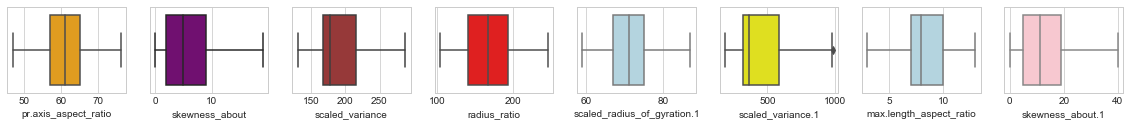

In [29]:
plt.figure(figsize= (20,15))
plt.subplot(8,8,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'], color='orange')

plt.subplot(8,8,2)
sns.boxplot(x= cleandf.skewness_about, color='purple')

plt.subplot(8,8,3)
sns.boxplot(x= cleandf.scaled_variance, color='brown')
plt.subplot(8,8,4)
sns.boxplot(x= cleandf['radius_ratio'], color='red')

plt.subplot(8,8,5)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'], color='lightblue')

plt.subplot(8,8,6)
sns.boxplot(x= cleandf['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x= cleandf['max.length_aspect_ratio'], color='lightblue')

plt.subplot(8,8,8)
sns.boxplot(x= cleandf['skewness_about.1'], color='pink')

plt.show()

In [30]:
##Quick Comment:
##We can see that all out boxplot for all the attributes which had outlier have been treate and removed. Since no. of outliers were less we opted to remove it. Generally we avoid this as it can lead to info loss in case of large data sets with large no of outliers

In [31]:
##Understanding the relationship between all independent attribute:¶
##We will be using data correlation:

##Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset. Using Correlation, you can get some insights such as:

##One or multiple attributes depend on another attribute or a cause for another attribute.
##One or multiple attributes are associated with other attributes.
##Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

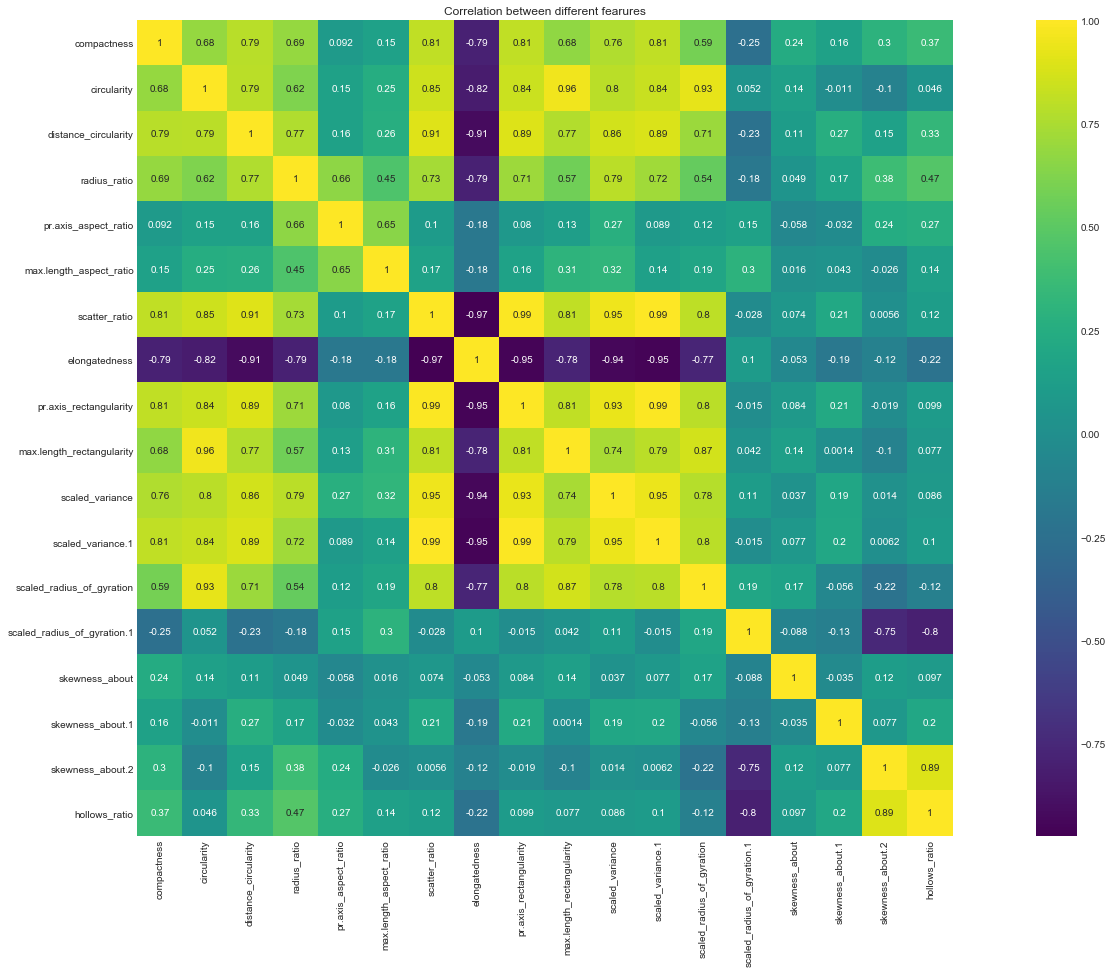

In [32]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
cleandf= newdf.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(cleandf, 30,15)

In [33]:
 ##Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98 ##skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
 ##ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
 ##compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
 ##scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
 ##pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
 ##scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
 ##elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

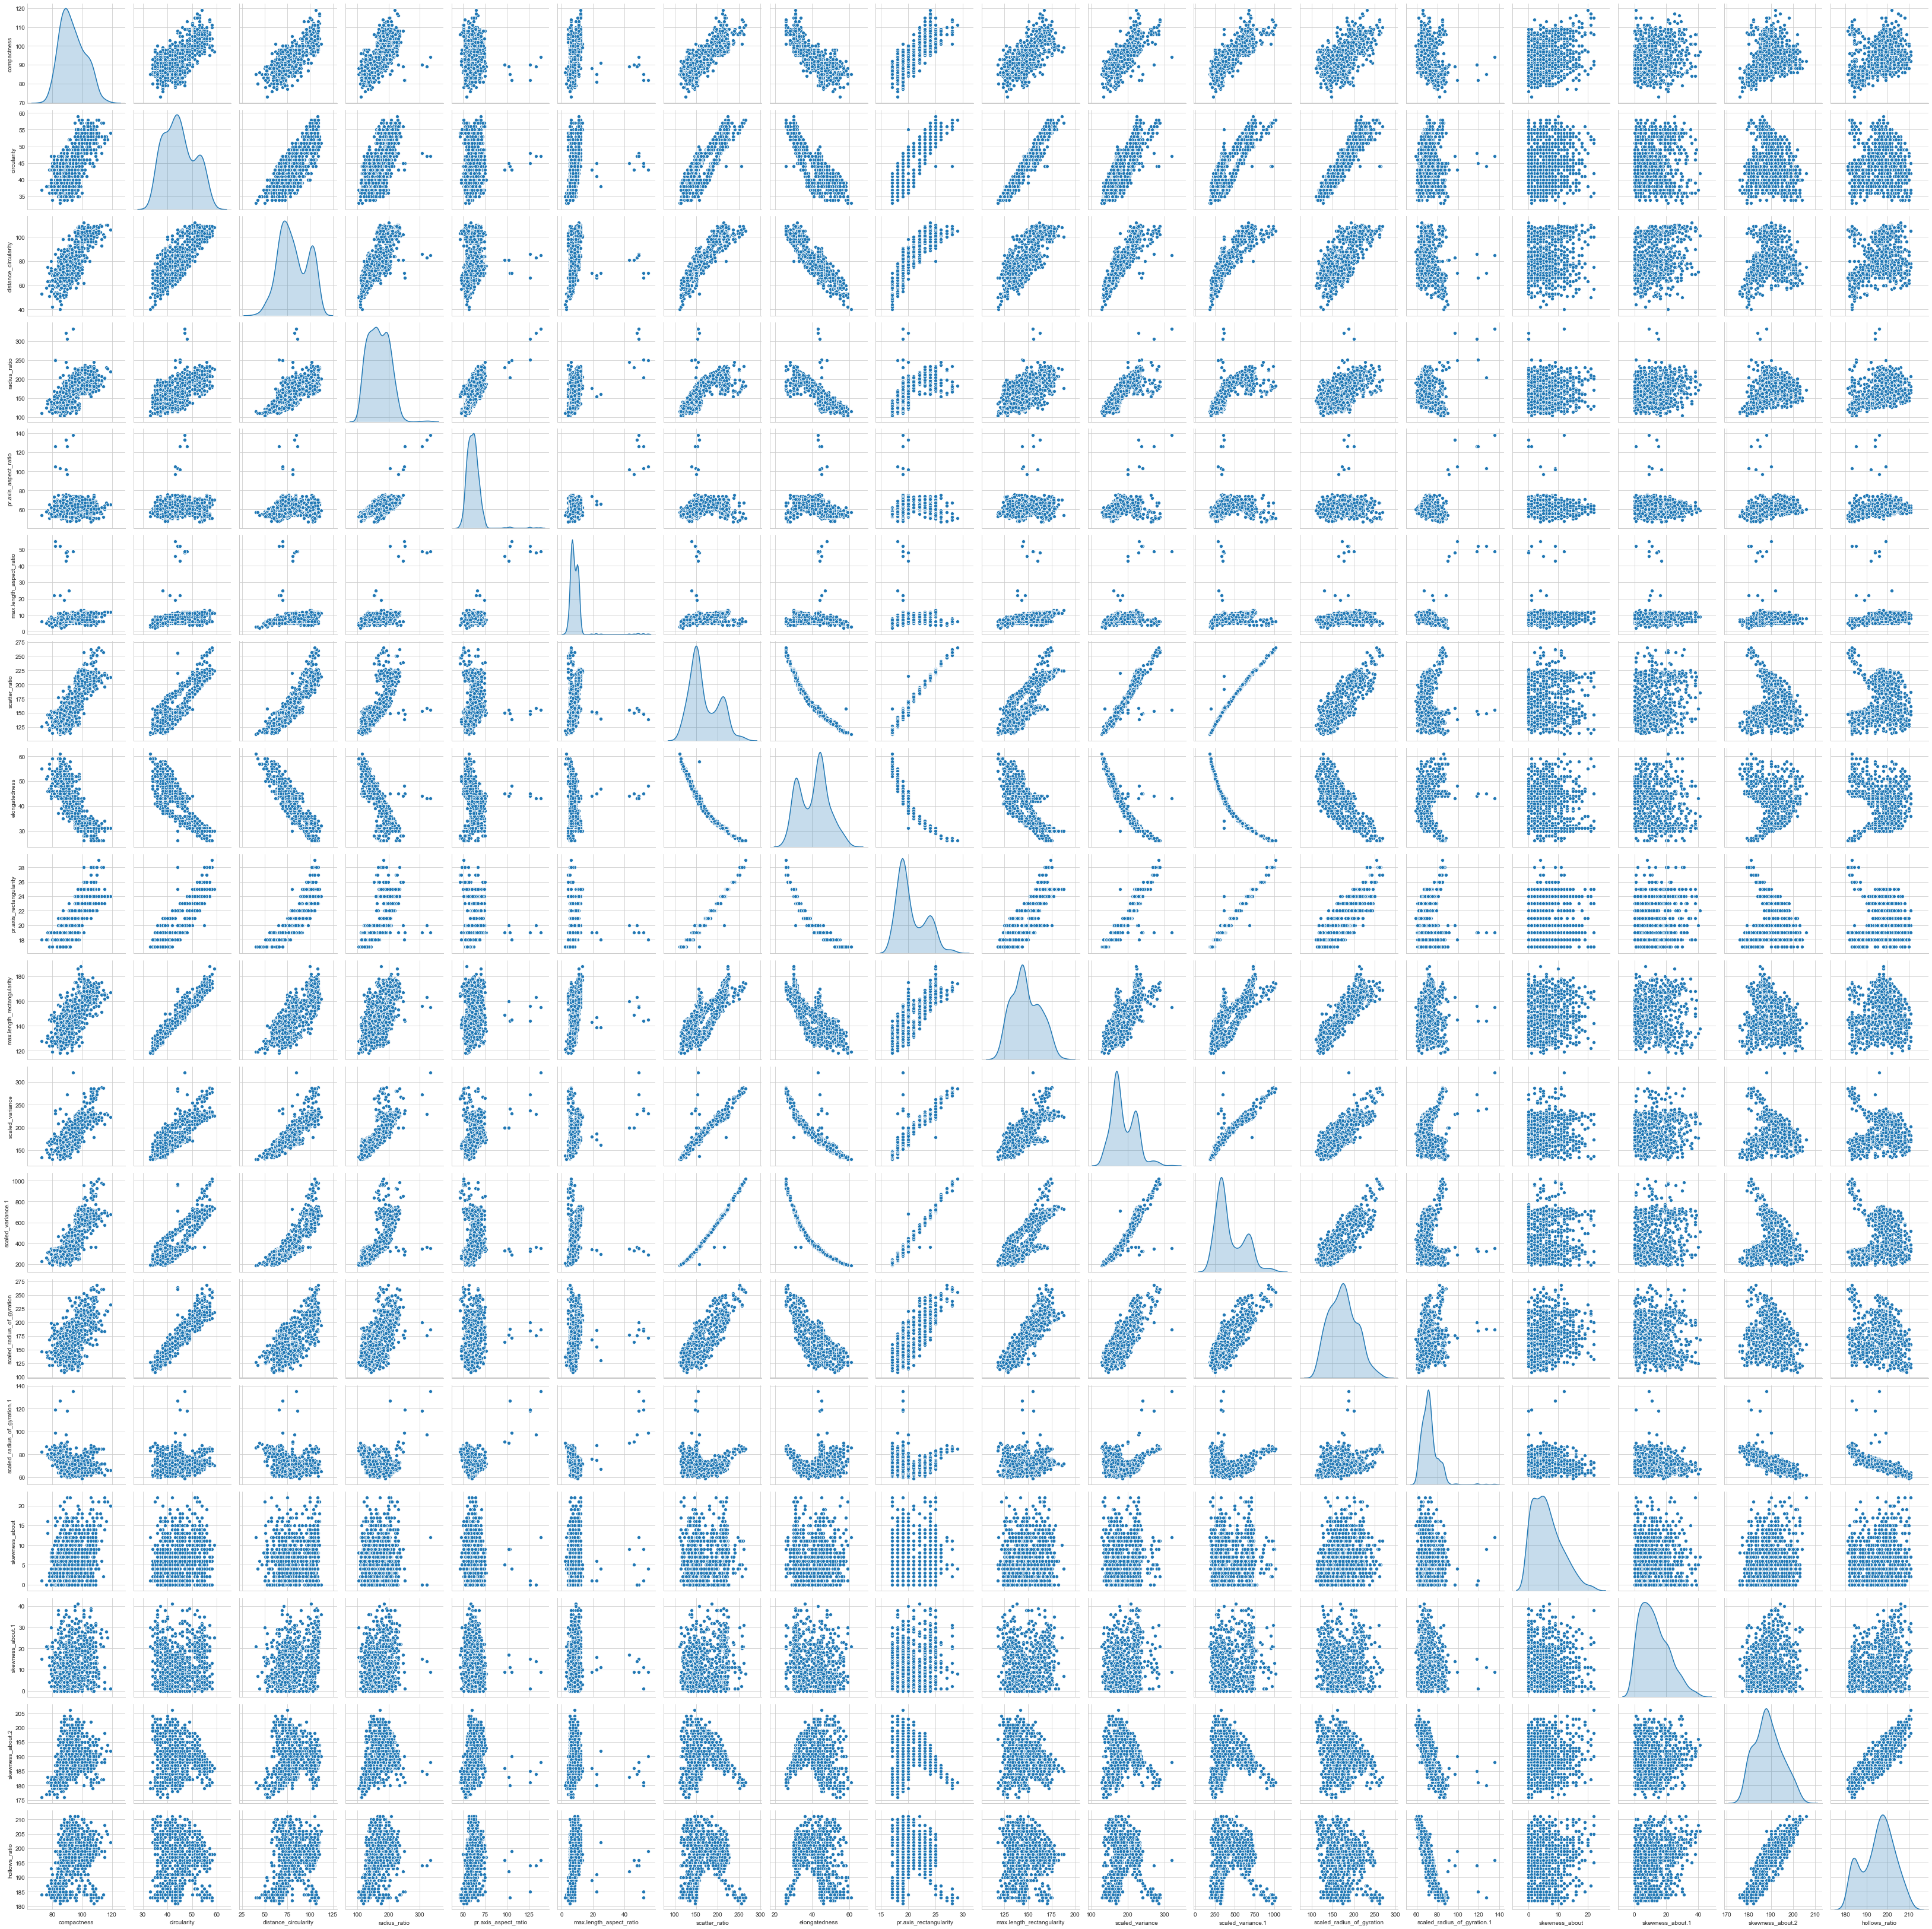

In [34]:
sns.pairplot(cleandf, diag_kind="kde")

In [35]:
#As observed in our correlation heatmap our pairplot seems to validate the same. Scaled Variance & Scaled Variance.1 seems to be have very strong positive correlation with value of 0.98. skewness_about_2 and hollow_ratio also seems to have strong positive correation with coeff: 0.89

#scatter_ratio and elongatedness seems to be have very strong negative correlation. elongatedness and pr.axis_rectangularity seems to have strong negative correlation with val of

#We found from our pairplot analysis that, Scaled Variance & Scaled Variance.1 and elongatedness and pr.axis_rectangularity to be strongly correlated , so they need to dropped of treated carefully before we go for model building

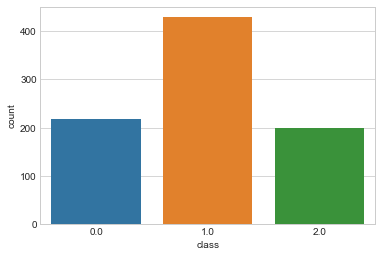

In [36]:
#display how many are car,bus,van. 
newdf['class'].value_counts()

splitscaledf = newdf.copy()
sns.countplot(newdf['class'])
plt.show()

In [37]:
#now separate the dataframe into dependent and independent variables
#X1= newdf.drop('class',axis=1)
#y1 = newdf['class']
#print("shape of new_vehicle_df_independent_attr::",X.shape)
#print("shape of new_vehicle_df_dependent_attr::",y.shape)

X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

X

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [38]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [39]:
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  

In [40]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [41]:
# Make a set of (eigenvalue, eigenvector) pairs:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088707, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524637, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.903525021838969, array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
        0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
        0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
       -0.07528289,  0.00873592,  0.03952427])), (1.1799374684450192, array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
        0.03141473, -0.09574857,  0.0822902 , -0.09

In [42]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%

In [46]:
l=('individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

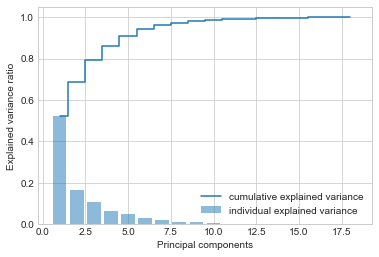

In [47]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
##From above we plot we can clealry observer that 8 dimension() are able to explain 95 %variance of data. 
##so we will use first 8 principal components going forward and calulate the reduced dimensions. 

In [48]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026   1.001584  0.176612  0.079301  0.757447  0.901124   
1   -1.591711  0.420603  -0.369034  0.233234  0.693949  0.517162 -0.378637   
2    3.769324 -0.195283   0.087859  1.202212  0.731732 -0.705041  0.034584   
3   -1.738598  2.829692   0.109456  0.376685 -0.362897  0.484431 -0.470753   
4    0.558103 -4.758422  11.703647  0.147464  3.256953  0.203446 -2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884   0.197213 -1.444958  1.065425 -0.820179  0.041563   
842 -0.314956 -0.164511   0.794573 -0.908272 -0.235492  1.438257  0.599113   
843  4.809174  0.001249   0.532333  0.295652 -1.344236  0.217070 -0.573249   
844 -3.294092  1.008276  -0.357003 -1.933675  0.042768  0.402491  0.202406   
845 -4.765053 -0.334900  -0.568136 -1.224807 -0.054051  0.335637 -0.058098   

            7  
0   -0.381106  
1    0.247059  
2    0.482772  
3   -0.023086  
4   -0.448854  
..        ...  
841  0.506991  
842 -0.153086  
843  0.110478  
844  0.320622  
845 -0.248035  

[846 rows x 8 columns]

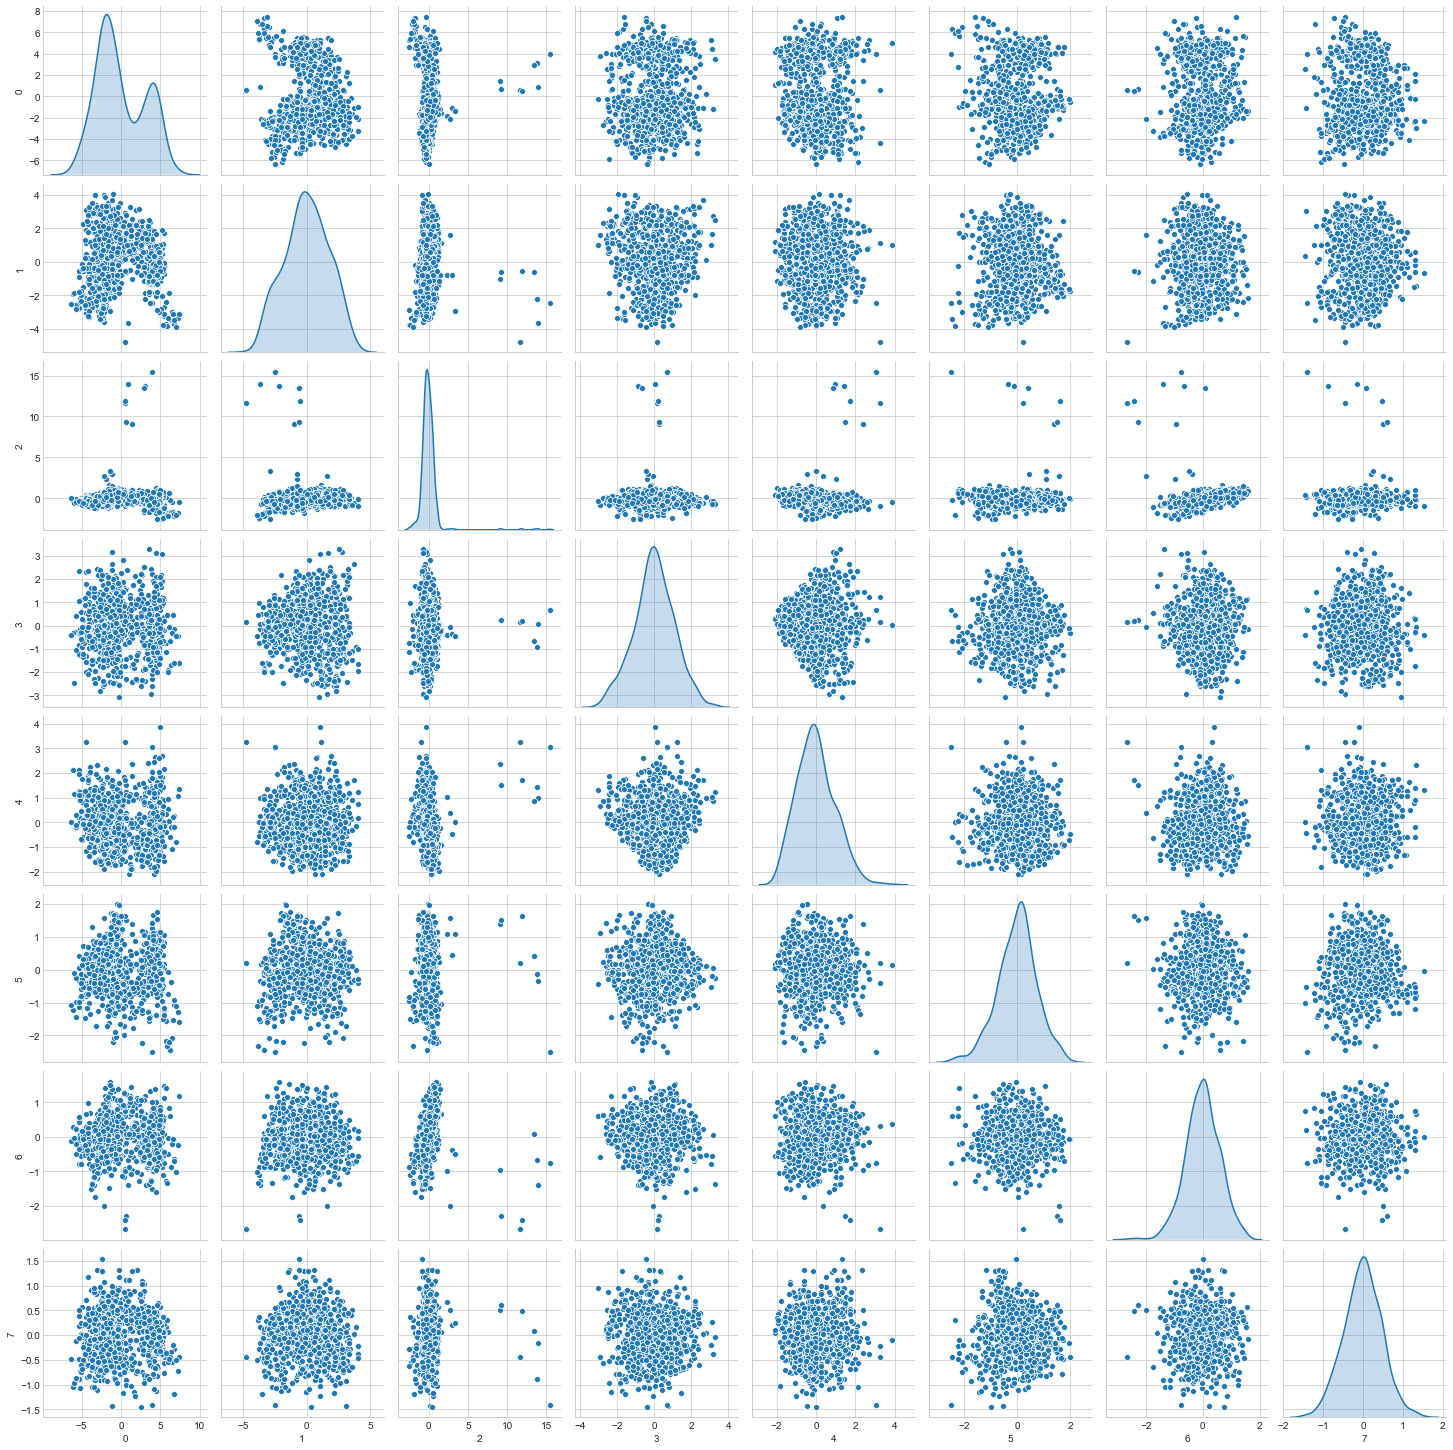

In [49]:
sns.pairplot(reduced_pca, diag_kind='kde') 
#sns.pairplot(reduced_pca1, diag_kind='kde')

In [ ]:
##It is clealry visible from the pairplot above that:
##After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves. As most of them have cloud of data points with no lienaer kind of relationship.

In [ ]:
##Fitting Model and measuring score simply on Original Data :¶
##Fit SVC Model ON Train-test Data:
##Let's build two Support Vector Classifier Model one with 18 original independent variables and the second one with only the 8 new reduced variables constructed using PCA.

In [51]:
#now split the data into 70:30 ratio

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)
#pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca1,y,test_size=0.30,random_state=1)

In [52]:
svc = SVC() #instantiate the object

In [53]:
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

In [56]:
#now fit the model on pca data with new dimension
svc1 = SVC() #instantiate the object
svc1.fit(pca_X_train,pca_y_train)

#predict the y value
pca_y_predict = svc1.predict(pca_X_test)

In [57]:
print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

print("Before PCA On Original 18 Dimension",accuracy_score(Orig_y_test,Orig_y_predict))
print("After PCA(On 8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Model Score On Original Data  0.952755905511811
Model Score On Reduced PCA Dimension  0.937007874015748
Before PCA On Original 18 Dimension 0.952755905511811
After PCA(On 8 dimension) 0.937007874015748


In [ ]:
##Quick Observation:
##On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 95 %
##But when we applied the SVC model on PCA componenets(reduced dimensions) our model scored 93 %.
##Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.

Confusion Matrix For : 
 Original Data Set [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


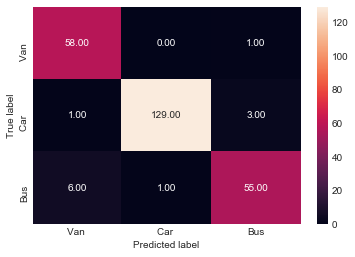

Confusion Matrix For : 
 For Reduced Dimensions Using PCA  [[ 57   1   1]
 [  2 126   5]
 [  5   2  55]]


Classification Report For Raw Data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Classification Report For PCA: 
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        59
         1.0       0.98      0.95      0.96       133
         2.0       0.90      0.89      0.89        62

    accuracy                           0.94       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254



In [58]:
 ##Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

draw_confmatrix(Orig_y_test, Orig_y_predict,"Van ", "Car ", "Bus", "Original Data Set" )

draw_confmatrix(pca_y_test, pca_y_predict,"Van ", "Car ", "Bus", "For Reduced Dimensions Using PCA ")

#Classification Report Of Model built on Raw Data
print("Classification Report For Raw Data:", "\n", classification_report(Orig_y_test,Orig_y_predict))

#Classification Report Of Model built on Principal Components:

print("Classification Report For PCA:","\n", classification_report(pca_y_test,pca_y_predict))

In [ ]:
##Quick Comments:
##Confusion Metric Analysis ON Original Data:
###Confusion Matrix For : Original Data Set [[ 58 0 1] [ 1 129 3] [ 6 1 55]]

##Our model on original data set has correctly classified 58 van out of 59 actuals vans and has errored only in one case where it has wrongly predicted van to be a bus.  
##IN case of 133 actual cars our svm model has correcly classified 129 cars. it has wrongly classified 3 cars to be a bus and also 1 car to be a van
##In case of 62 instances of actual bus , our model has correctly classified 55 buses , It has faltered in classifying wrongly 6 buses to be a van and one bus to be a car. 


##Confusion Metric Analysis ON Reduced Dimesnion After PCA :
##For Reduced Dimensions Using PCA: [[ 57 2 0] [ 2 126 5] [ 1 7 54]]

##Out of 59 actual instances of vans our model has correctly predicted 57 vans and errored in 2 instances where it wrongly classified vans to be a car. 
##Out of 133 actuals cars , our mdoel has correclty classified 126 of them to be a  car and faltered in 7 cases where it wrongly classified 5 cars to a bus and 2 cars to be a van. 

##Out of 62 actual bus , our model has correclty classified 54 of them to be a bus. It has faltered in 8 cases where it wrongly classified 7 bus to be a car and 1 bus to be a van.

##Let's See The Classification Report Metrics:
##Classification Report For Raw Data: precision recall f1-score support

     0.0       0.89      0.98      0.94        59
     1.0       0.99      0.97      0.98       133
     2.0       0.93      0.89      0.91        62

##micro avg 0.95 0.95 0.95 254 macro avg 0.94 0.95 0.94 254 weighted avg 0.95 0.95 0.95 254

##Classification Report For PCA: precision recall f1-score support

     0.0       0.95      0.97      0.96        59
     1.0       0.93      0.95      0.94       133
     2.0       0.92      0.87      0.89        62

micro avg 0.93 0.93 0.93 254 macro avg 0.93 0.93 0.93 254 weighted avg 0.93 0.93 0.93 254

Insights On Classification Reports:
On original data:
our model has 99 % precison  score when it comes to classify car from the given set of silhoutte parameters. It has 89 % precision when it comes to classifying the input as van, while it has 93 % precison when it come to predict data as bus. 

In term of recall score our model has recal score of 98 % for van classification, 97 % for car and 89 % for bus. OUr model has an weighted average of 95 % for all classification metrics. 